#### The goal of this project is to develop a machine learning model that can accurately detect fraudulent credit card transactions using historical data. By analyzing transaction patterns, the model should be able to distinguish between normal and fraudulent activity, helping financial institutions flag suspicious behavior early and reduce potential risks.

### Step 1: Importing necessary Libraries
#### We begin by importing the necessary Python libraries: numpy, pandas, matplotlib and seaborn for data handling, visualization and model building.

In [10]:
pip install numpy pandas matplotlib seaborn

  Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl.metadata (52 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

Matplotlib is building the font cache; this may take a moment.


### Step 2: Loading the Data
##### Load the dataset into a pandas DataFrame and examine its structure. The dataset contains 284,807 transactions with 31 features including:

##### Time: This shows how many seconds have passed since the first transaction in the dataset.
##### V1-V28: These are special features created to hide sensitive information about the original data.
##### Amount: Transaction amount.
##### Class: Target variable (0 for normal transactions, 1 for fraudulent transactions).

In [13]:
data = pd.read_csv("creditcard.csv")
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [14]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.384974e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.021879e-15  1.494498e-15 -5.620335e-16  1.149614e-16 -2.414189e-15   
std    1.380247e+00  1.332271e+00  1.23709

#### Step 3: Analyzing Class Distribution
##### The next step is to check the distribution of fraudulent vs. normal transactions.

##### We separate the dataset into two groups: fraudulent transactions (Class == 1) and valid transactions (Class == 0).
##### It calculates the ratio of fraud cases to valid cases to measure how imbalanced the dataset is.
##### It then prints the outlier fraction along with the number of fraud and valid transactions.
##### This analysis is crucial in fraud detection, as it reveals how rare fraud cases are and whether techniques like resampling or special evaluation metrics are needed.

In [15]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


#### Step 4: Exploring Transaction Amounts
##### Let's compare the transaction amounts for fraudulent and normal transactions. This will help us understand if there are any significant differences in the monetary value of fraudulent transactions.

In [16]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

#### Step 5: Plotting Correlation Matrix
##### We can visualize the correlation between features using a heatmap using correlation matrix. This will give us an understanding of how the different features are correlated and which ones may be more relevant for prediction.

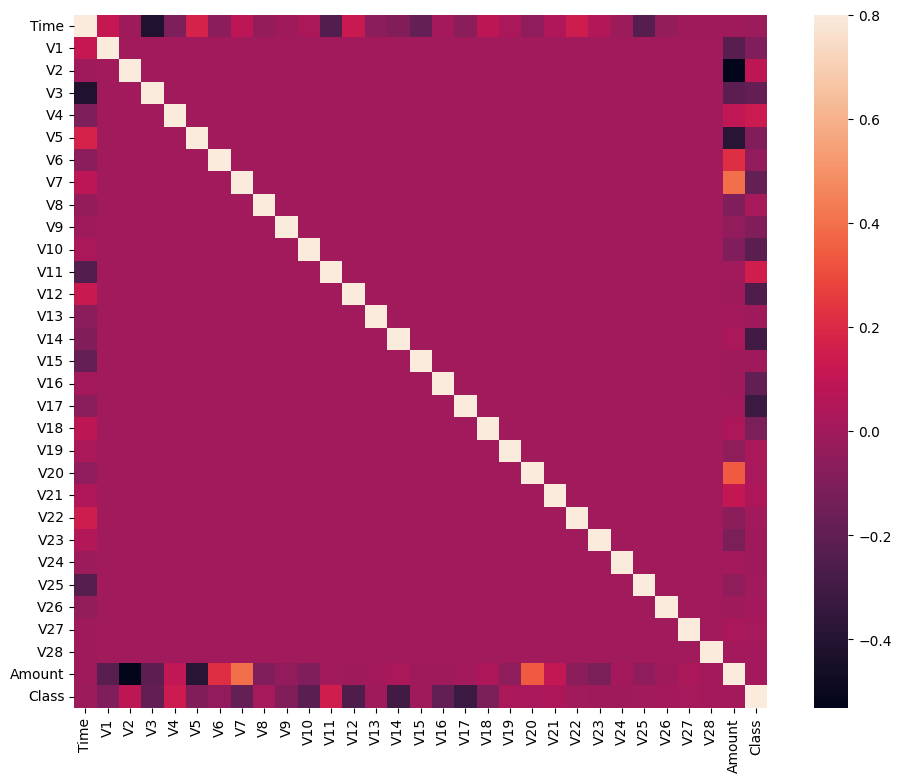

In [18]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

#### Step 6: Preparing Data
##### Separate the input features (X) and target variable (Y) then split the data into training and testing sets

##### X = data.drop(['Class'], axis = 1) removes the target column (Class) from the dataset to keep only the input features.
##### Y = data["Class"] selects the Class column as the target variable (fraud or not).
##### X.shape and Y.shape print the number of rows and columns in the feature set and the target set.
##### xData = X.values and yData = Y.values convert the Pandas DataFrame or Series to NumPy arrays for faster processing.
##### train_test_split(...) splits the data into training and testing sets into 80% for training, 20% for testing.
##### random_state=42 ensures reproducibility (same split every time you run it).

In [23]:
pip install scikit-learn

     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.0 kB 445.2 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 545.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.1 MB 3.4 MB/s eta 0:00:03
   ---------------------------------------- 0.1/8.1 MB 3.4 MB/s eta 0:00:03
    --------------------------------------- 0.1/8.1 MB 731.4 kB/s eta 0:00:11
    --------------------------------------- 0.1/8.1 MB 731.4 kB/s eta 0:00:11
    --------------------------------------- 0.2/8.1 MB 787.7 kB/s eta 0:00:11
    --------------------------------------- 0.2/8.1 MB 787.7 kB/s eta 0:00:11
   - -------------------------------------- 0.3/8.1 MB 842.9 kB/s eta 0:00:10
   - -------------------------------------- 0.3/8.1 MB 764.6 kB/s eta 0:00:11
   - --


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

(284807, 30)
(284807,)


#### Step 7: Building and Training the Model
##### Train a Random Forest Classifier to predict fraudulent transactions.

#### from sklearn.ensemble import RandomForestClassifier: This imports the RandomForestClassifier from sklearn.ensemble, which is used to create a random forest model for classification tasks.
##### rfc = RandomForestClassifier(): Initializes a new instance of the RandomForestClassifier.
##### rfc.fit(xTrain, yTrain): Trains the RandomForestClassifier model on the training data (xTrain for features and yTrain for the target labels).
##### yPred = rfc.predict(xTest): Uses the trained model to predict the target labels for the test data (xTest), storing the results in yPred.

In [25]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)

#### Step 8: Evaluating the Model
##### After training the model we need to evaluate its performance using various metrics such as accuracy, precision, recall, F1-score and the Matthews correlation coefficient.

Model Evaluation Metrics:
Accuracy: 0.9996
Precision: 0.9872
Recall: 0.7857
F1-Score: 0.8750
Matthews Correlation Coefficient: 0.8805


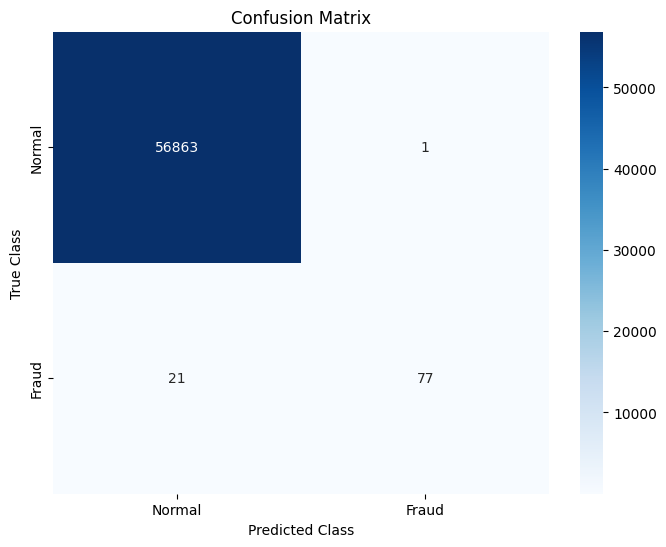

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix 
accuracy = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
mcc = matthews_corrcoef(yTest, yPred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

### Model Evaluation Metrics:
##### The model accuracy is high due to class imbalance so we will have computed precision, recall and f1 score to get a more meaningful understanding. We observe:

##### Accuracy: 0.9996: Out of all predictions, 99.96% were correct. However, in imbalanced datasets (like fraud detection), accuracy can be misleading i.e. a model that predicts everything as "not fraud" will still have high accuracy.
##### Precision: 0.9873: When the model predicted "fraud", it was correct 98.73% of the time. High precision means very few false alarms (false positives).
##### Recall: 0.7959: Out of all actual fraud cases, the model detected 79.59%. This shows how well it catches real frauds. A lower recall means some frauds were missed (false negatives).
##### F1-Score: 0.8814: A balance between precision and recall. 88.14% is strong and shows the model handles both catching fraud and avoiding false alarms well.
##### Matthews Correlation Coefficient (MCC): 0.8863: A more balanced score (from -1 to +1) even when classes are imbalanced. A value of 0.8863 is very good, it means the model is making strong, balanced predictions overall.